The analytical solution to the Poisson equation is:
   4    3     
  x    x    x 
- ── + ── - ──
  12   6    12


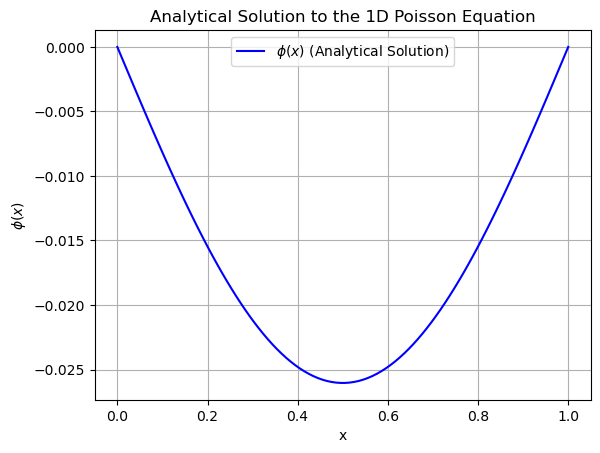

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
# Define symbols
x, C1, C2 = sp.symbols('x C1 C2')

# Define the source term s(x) = x * (1 - x)
s = x * (1 - x)

# Integrate the source term to get the first derivative of phi(x)
phi_prime = sp.integrate(s, x) + C1  # First integration (derivative of phi)

# Integrate again to get phi(x)
phi = sp.integrate(phi_prime, x) + C2  # Second integration

# Define boundary conditions
phi_L = 0  # phi(0) = phi_L
phi_R = 0  # phi(1) = phi_R

# Apply boundary conditions to find C1 and C2
# phi(0) = phi_L
C2_value = sp.solve(phi.subs(x, 0) - phi_L, C2)[0]

# phi(1) = phi_R
C1_value = sp.solve(phi.subs(x, 1) - phi_R, C1)[0]

# Substitute the constants into the solution
phi_solution = phi.subs({C1: C1_value, C2: C2_value})

# Print the final analytical solution
print("The analytical solution to the Poisson equation is:")
sp.pprint(phi_solution)

# Optionally, plot the solution using numpy and matplotlib for visualization


# Create a function to evaluate the solution
phi_func = sp.lambdify(x, phi_solution, 'numpy')

# Generate x values for plotting
x_vals = np.linspace(0, 1, 100)

# Compute phi(x) values
phi_vals = phi_func(x_vals)

# Plot the solution
plt.plot(x_vals, phi_vals, label=r'$\phi(x)$ (Analytical Solution)', color='b')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('Analytical Solution to the 1D Poisson Equation')
plt.grid(True)
plt.legend()
plt.show()
